# Machine Learning Classifier

## import libraries

In [1]:
# !pip install pandas
import pandas as pd
import json
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [94]:
# !pip install graphviz
import graphviz 
from IPython.display import SVG
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics

## read CSVs to dataframes

In [3]:
# news_media_basic_data

combined_analysis_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/combined_analysis_data.csv')
combined_analysis_data

user_id                  user_name  user_followers_count  \
0   4.283330e+05          CNN Breaking News            63662926.0   
1   6.124730e+05              BBC News (UK)            14276300.0   
2   7.421430e+05           BBC News (World)            37774379.0   
3   7.592510e+05                        CNN            59357266.0   
4   7.885240e+05              Guardian news             3802981.0   
5   8.070950e+05         The New York Times            53885565.0   
6   1.367531e+06                   Fox News            22228143.0   
7   1.652541e+06                    Reuters            25471928.0   
8   1.917731e+06                   The Hill             4436643.0   
9   2.467791e+06        The Washington Post            19648090.0   
10  2.836421e+06                      MSNBC             4814934.0   
11  2.884771e+06                   Newsweek             3572805.0   
12  3.108351e+06    The Wall Street Journal            20084774.0   
13  5.392522e+06                        NPR             8983290.0   
14  5.402612e+06          BBC Breaking News            50727938.0   
15  5.741722e+06               NPR Politics             3063376.0   
16  5.988062e+06              The Economist            26869991.0   
17  7.587032e+06                   Sky News             7955300.0   
18  7.998482e+06         USA TODAY Politics              225721.0   
19  9.300262e+06                   POLITICO             4667612.0   
20  1.077465e+07                   TheBlaze              793465.0   
21  1.185603e+07               NBC Politics              666839.0   
22  1.385042e+07               CNN Politics             4439094.0   
23  1.417332e+07                   NBC News             9212344.0   
24  1.429331e+07                       TIME            19226664.0   
25  1.443406e+07               NYT Politics              524759.0   
26  1.451195e+07                   HuffPost            11358112.0   
27  1.466235e+07       The Washington Times              428947.0   
28  1.467792e+07             The New Yorker             9069623.0   
29  1.501249e+07                   CBS News             8719635.0   
30  1.516456e+07                      Slate             1759759.0   
31  1.545869e+07          HuffPost Politics             1439771.0   
32  1.575428e+07                  USA TODAY             4823489.0   
33  1.601278e+07            The Daily Beast             1389316.0   
34  1.603292e+07          Fox News Politics             1830566.0   
35  1.681564e+07          ABC News Politics             1079807.0   
36  1.693529e+07             Democracy Now!              807400.0   
37  1.851086e+07               Mother Jones              861988.0   
38  1.876770e+07          CBS News Politics              313486.0   
39  1.895607e+07        Washington Examiner              309186.0   
40  2.878549e+07                   ABC News            17644680.0   
41  2.909782e+07            The Epoch Times              486052.0   
42  3.235329e+07           The Economist US              139065.0   
43  3.471336e+07                  Bloomberg             8533888.0   
44  3.577304e+07               The Atlantic             2156682.0   
45  4.763640e+07          Guardian politics              256191.0   
46  6.932953e+07          BBC North America              312777.0   
47  8.781841e+07               The Guardian            10646480.0   
48  9.147862e+07                     Forbes            18202881.0   
49  1.409285e+08          POLITICO New York               39701.0   
50  2.705084e+08              CBS News Poll               13369.0   
51  3.802854e+08              Daily Mail US              416368.0   
52  3.844381e+08              ABC News Live               96020.0   
53  5.641116e+08         Bloomberg Politics              361262.0   
54  1.408004e+09             The Federalist              344587.0   
55  2.329067e+09              The Intercept              866020.0   
56  2.347049e+09                        Vox             1046634.0   
57  4.0

In [4]:
combined_analysis_data.describe()

user_id  user_followers_count  user_following_count  \
count  5.900000e+01          5.900000e+01             59.000000   
mean   1.998462e+16          9.783685e+06           3856.135593   
std    1.535048e+17          1.529765e+07          14899.722714   
min    4.283330e+05          8.158000e+03              3.000000   
25%    5.572167e+06          5.054055e+05            261.000000   
50%    1.501249e+07          3.063376e+06            722.000000   
75%    3.524320e+07          1.100230e+07           1328.000000   
max    1.179092e+18          6.366293e+07          94642.000000   

       count_total_tweet_id  count_total_tweet_created_at_date  \
count             59.000000                          59.000000   
mean            2647.966102                          40.372881   
std             1882.029269                          12.223350   
min               33.000000                           3.000000   
25%              876.500000                          35.000000   
50%             2717.000000                          46.000000   
75%             4136.000000                          49.000000   
max             6213.000000                          49.000000   

       average_total_tweet_per_day  count_reply  count_retweet  count_tweet  \
count                    59.000000    59.000000      59.000000    59.000000   
mean                     80.792542    77.728814     216.610169  2353.627119   
std                      89.709087   122.314297     320.622671  1777.971664   
min                       1.740000     0.000000       0.000000     2.000000   
25%                      20.490000     3.500000      25.500000   711.500000   
50%                      55.450000    27.000000     106.000000  2134.000000   
75%                     101.995000    97.000000     259.000000  3797.000000   
max                     420.500000   558.000000    1793.000000  5977.000000   

       overall_avg_scores_compound  ...  \
count                    59.000000  ...   
mean                     -0.061654  ...   
std                       0.085536  ...   
min                      -0.241345  ...   
25%                      -0.110137  ...   
50%                      -0.059116  ...   
75%                      -0.004428  ...   
max                       0.123502  ...   

       tweet_ct_inflation_keyword_avg_scores_compound  average_tweet_per_day  \
count                                       59.000000              59.000000   
mean                                        -0.013357              73.146780   
std                                          0.140790              86.546649   
min                                         -0.316207               0.070000   
25%                                         -0.103217              16.285000   
50%                                         -0.024580              43.550000   
75%                                          0.089934              87.140000   
max                                          0.381800             409.640000   

       average_retweet_per_day  average_reply_per_day  \
count                59.000000              59.000000   
mean                  5.685932               1.960847   
std                   9.200516               2.987993   
min                   0.000000               0.000000   
25%                   0.710000               0.100000   
50%                   3.240000               0.950000   
75%                   6.060000               2.060000   
max                  51.230000              13.290000   

       tweet_ct_abortion_keyword_percentage  \
count                             59.000000   
mean                               0.043220   
std                                0.033448   
min                                0.000000   
25%                                0.020000   
50%                                0.030000   
75%                                0.070000   
max                                0.150000   

       tweet_ct_gun_control_keyword_percentage  \
coun

In [5]:
combined_analysis_data.shape

(59, 36)

In [6]:
combined_analysis_data.isnull().sum()

user_id                                                 0
user_name                                               0
user_followers_count                                    0
user_following_count                                    0
news_media                                              0
us_or_foreign                                           0
general_or_political                                    0
political_spectrum                                      0
count_total_tweet_id                                    0
count_total_tweet_created_at_date                       0
average_total_tweet_per_day                             0
count_reply                                             0
count_retweet                                           0
count_tweet                                             0
overall_avg_scores_compound                             0
tweet_ct_abortion_keyword                               0
tweet_ct_abortion_keyword_avg_scores_compound           0
tweet_ct_gun_c

In [7]:
combined_analysis_data['is_us_media'] = np.where(combined_analysis_data['us_or_foreign']== 'US', 1, 0)

In [8]:
combined_analysis_data['is_political_account'] = np.where(combined_analysis_data['general_or_political']== 'Political', 1, 0)

In [9]:
combined_analysis_data.head()

user_id          user_name  user_followers_count  user_following_count  \
0  428333.0  CNN Breaking News            63662926.0                 121.0   
1  612473.0      BBC News (UK)            14276300.0                  93.0   
2  742143.0   BBC News (World)            37774379.0                  18.0   
3  759251.0                CNN            59357266.0                1103.0   
4  788524.0      Guardian news             3802981.0                1225.0   

     news_media us_or_foreign general_or_political political_spectrum  \
0           CNN            US              General               Left   
1      BBC News       Foreign              General             Middle   
2      BBC News       Foreign              General             Middle   
3           CNN            US              General               Left   
4  The Guardian       Foreign              General               Left   

   count_total_tweet_id  count_total_tweet_created_at_date  ...  \
0                   249                                 48  ...   
1                  3798                                 49  ...   
2                  2094                                 49  ...   
3                  3898                                 49  ...   
4                  4144                                 35  ...   

   average_retweet_per_day  average_reply_per_day  \
0                     0.23                   0.02   
1                     7.67                   0.04   
2                     2.16                   0.04   
3                     0.51                   0.37   
4                     0.00                   0.00   

   tweet_ct_abortion_keyword_percentage  \
0                                  0.03   
1                                  0.00   
2                                  0.01   
3                                  0.03   
4                                  0.01   

   tweet_ct_gun_control_keyword_percentage  \
0                                     0.05   
1                                     0.01   
2                                     0.02   
3                                     0.04   
4                                     0.01   

   tweet_ct_gay_marriage_keyword_percentage  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   tweet_ct_climate_change_keyword_percentage  \
0                                        0.05   
1                                        0.03   
2                                        0.04   
3                                        0.06   
4                                        0.05   

   tweet_ct_gender_identity_keyword_percentage  \
0                                         0.00   
1                                         0.01   
2                                         0.01   
3                                         0.02   
4                                         0.01   

   tweet_ct_inflation_keyword_percentage  is_us_media  is_political_account  
0                                   0.03            1                     0  
1                                   0.03            0                     0  
2                                   0.01            0                     0  
3                                   0.02            1                     0  
4                                   0.03            0                     0  

[5 rows x 38 columns]

## classifiers

### decision tree

In [135]:
x = combined_analysis_data[[
    'user_followers_count',
    'user_following_count',
    'is_us_media',
    'is_political_account',
    'average_total_tweet_per_day',
    'average_tweet_per_day',
    'average_retweet_per_day',
    'average_reply_per_day',
    'tweet_ct_abortion_keyword_avg_scores_compound', 
    'tweet_ct_gun_control_keyword_avg_scores_compound', 
    'tweet_ct_gay_marriage_keyword_avg_scores_compound',
    'tweet_ct_climate_change_keyword_avg_scores_compound',
    'tweet_ct_gender_identity_keyword_avg_scores_compound',
    'tweet_ct_inflation_keyword_avg_scores_compound', 
    'tweet_ct_abortion_keyword_percentage',
    'tweet_ct_gun_control_keyword_percentage',
    'tweet_ct_gay_marriage_keyword_percentage',
    'tweet_ct_climate_change_keyword_percentage',
    'tweet_ct_gender_identity_keyword_percentage',
    'tweet_ct_inflation_keyword_percentage'
]]
y = combined_analysis_data['political_spectrum']

In [136]:
features = x.columns.tolist()
target = combined_analysis_data['political_spectrum'].values

In [137]:
len(features)

20

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [139]:
# train a decision tree
dtree = tree.DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(x_train, y_train)

In [140]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,24), dpi=800)
tree.plot_tree(dtree,
              feature_names = features,
              class_names=target,
              filled = True)

[Text(0.328125, 0.9285714285714286, 'user_following_count <= 107.0\ngini = 0.525\nsamples = 47\nvalue = [30, 10, 7]\nclass = Left'),
 Text(0.125, 0.7857142857142857, 'tweet_ct_gender_identity_keyword_percentage <= 0.03\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = Middle'),
 Text(0.0625, 0.6428571428571429, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = Middle'),
 Text(0.1875, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Middle'),
 Text(0.53125, 0.7857142857142857, 'tweet_ct_inflation_keyword_avg_scores_compound <= -0.093\ngini = 0.449\nsamples = 42\nvalue = [30, 6, 6]\nclass = Left'),
 Text(0.3125, 0.6428571428571429, 'tweet_ct_abortion_keyword_percentage <= 0.015\ngini = 0.568\nsamples = 13\nvalue = [6, 1, 6]\nclass = Left'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Left'),
 Text(0.375, 0.5, 'tweet_ct_gay_marriage_keyword_avg_scores_compound <= 0.382\ngini = 0.494\nsamples = 9\nvalue = [2, 1, 6]\nclass = Middle'),

In [141]:
#Predict the response for test dataset
y_pred = dtree.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [142]:
# Create Decision Tree classifer object
dtree_entropy = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dtree_entropy = dtree_entropy.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = dtree_entropy.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


In [143]:
dtree.feature_importances_ 

array([0.        , 0.171133  , 0.        , 0.        , 0.        ,
       0.0714454 , 0.        , 0.        , 0.06945813, 0.        ,
       0.1477593 , 0.        , 0.12543579, 0.12952006, 0.11912762,
       0.        , 0.1012931 , 0.        , 0.06482759, 0.        ])

In [144]:
dtree.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [0.02836879 0.14658842 0.         0.         0.         0.06659201
 0.0212766  0.         0.         0.03404255 0.01870567 0.07997154
 0.05879271 0.         0.         0.03191489 0.         0.
 0.01985816 0.        ]


In [145]:
x.shape

(59, 20)

In [146]:
# Extracting the importances by sklearn 
importances_sk = dtree.feature_importances_

feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")

Feature importance by sklearn: {'user_followers_count': 0.0, 'user_following_count': 0.171, 'is_us_media': 0.0, 'is_political_account': 0.0, 'average_total_tweet_per_day': 0.0, 'average_tweet_per_day': 0.071, 'average_retweet_per_day': 0.0, 'average_reply_per_day': 0.0, 'tweet_ct_abortion_keyword_avg_scores_compound': 0.069, 'tweet_ct_gun_control_keyword_avg_scores_compound': 0.0, 'tweet_ct_gay_marriage_keyword_avg_scores_compound': 0.148, 'tweet_ct_climate_change_keyword_avg_scores_compound': 0.0, 'tweet_ct_gender_identity_keyword_avg_scores_compound': 0.125, 'tweet_ct_inflation_keyword_avg_scores_compound': 0.13, 'tweet_ct_abortion_keyword_percentage': 0.119, 'tweet_ct_gun_control_keyword_percentage': 0.0, 'tweet_ct_gay_marriage_keyword_percentage': 0.101, 'tweet_ct_climate_change_keyword_percentage': 0.0, 'tweet_ct_gender_identity_keyword_percentage': 0.065, 'tweet_ct_inflation_keyword_percentage': 0.0}


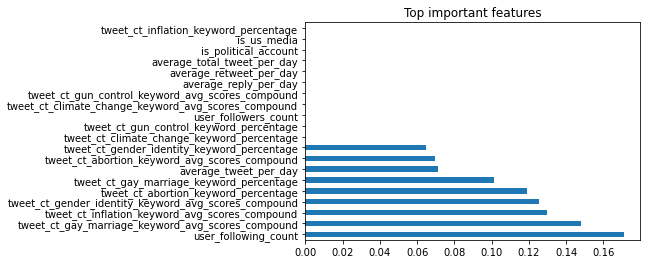

In [147]:
feat_importances = pd.Series(dtree.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top important features")
plt.show()

In [148]:
embeded_rf_selector = SelectFromModel(dtree, prefit=True)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = x.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features:', embeded_rf_feature)

9 selected features: ['user_following_count', 'average_tweet_per_day', 'tweet_ct_abortion_keyword_avg_scores_compound', 'tweet_ct_gay_marriage_keyword_avg_scores_compound', 'tweet_ct_gender_identity_keyword_avg_scores_compound', 'tweet_ct_inflation_keyword_avg_scores_compound', 'tweet_ct_abortion_keyword_percentage', 'tweet_ct_gay_marriage_keyword_percentage', 'tweet_ct_gender_identity_keyword_percentage']


In [149]:
x_selected = combined_analysis_data[['user_followers_count', 
                                     'user_following_count', 
                                     'average_tweet_per_day', 
                                     'tweet_ct_abortion_keyword_avg_scores_compound', 
                                     'tweet_ct_climate_change_keyword_avg_scores_compound', 
                                     'tweet_ct_gender_identity_keyword_avg_scores_compound', 
                                     'tweet_ct_gun_control_keyword_percentage']]

In [150]:
selected_features = x_selected.columns.tolist()

In [151]:
x_selected_train, x_selected_test, y_train, y_test = train_test_split(x_selected, y, test_size = 0.2)

In [152]:
# train a decision tree
dtree_2 = tree.DecisionTreeClassifier(criterion="gini")
dtree_2 = dtree_2.fit(x_selected_train, y_train)

In [153]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,24), dpi=800)
tree.plot_tree(dtree_2,
              feature_names = selected_features,
              class_names=target,
              filled = True)

[Text(0.31666666666666665, 0.9444444444444444, 'user_following_count <= 99.0\ngini = 0.527\nsamples = 47\nvalue = [30, 9, 8]\nclass = Left'),
 Text(0.13333333333333333, 0.8333333333333334, 'tweet_ct_gun_control_keyword_percentage <= 0.045\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]\nclass = Middle'),
 Text(0.06666666666666667, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Middle'),
 Text(0.2, 0.7222222222222222, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Middle'),
 Text(0.5, 0.8333333333333334, 'tweet_ct_climate_change_keyword_avg_scores_compound <= -0.22\ngini = 0.449\nsamples = 42\nvalue = [30, 6, 6]\nclass = Left'),
 Text(0.3333333333333333, 0.7222222222222222, 'average_tweet_per_day <= 21.235\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 3]\nclass = Middle'),
 Text(0.26666666666666666, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Left'),
 Text(0.4, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass =

In [154]:
#Predict the response for test dataset
y_pred = dtree_2.predict(x_selected_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


### logistic regression

In [40]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.511 (0.103)


In [42]:
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

TypeError: __init__() takes 2 positional arguments but 3 were given